# EDA with Python and applying Logistic Regression

For this lecture we will be wokring with the <u>Titanic Dataset from Kaggle</u>. This is a very famouse data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification-survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a 'Sem-cleaned' version of the titanic dataset, if you use the data set hosted directly on kaggle , you may need to some addition cleaning not show in this lecture notebook

## Import libraries

Let's Import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

# The Data
let's start by readingn in the titanic_train.csv file into a pandas dataframe.

In [3]:
train = pd.read_csv('F:/Python/EDA1-master/EDA1-master/titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Exploratory Data Analysis
Let's begin some exploratory data analysis! we'll start by checking out missing data!

# Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
 train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [16]:
 train.isnull().sum()/( train.isnull().sum()+train.count())*100 # to see how many % of data are missing 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
train.sum()

C:\Users\Anant\AppData\Local\Temp\ipykernel_20832\960887106.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.sum()


PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                     21205.17
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  28693.9493
dtype: object

<AxesSubplot:>

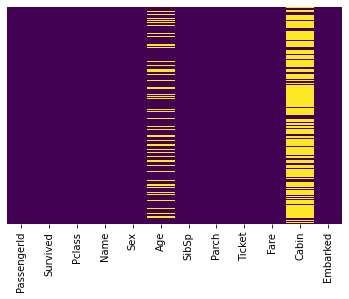

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#There are two records for which Embarked value is missing.What's strange is that sns.heatmap() doesn't always show them visually(with horizontal yellow bars). 
#I've tried this on my system too and there were times when it showed and at other times Embarked column was a solid purple.
#Puts a doubt on the reliability of sns.heatmap() to visualize missing values.
#Apparently these records are dropped somewhere around 26:00 probably by the line train.dropna(inplace=True). 
#Final record count is 889 rather than 891. If these records aren't dropped, then pd.get_dummies() changes the null 

<AxesSubplot:>

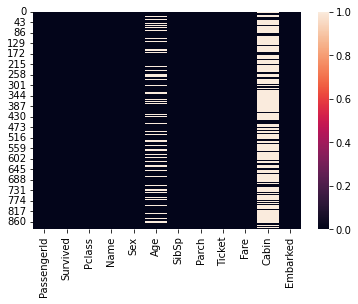

In [23]:

sns.heatmap(train.isnull())

<AxesSubplot:>

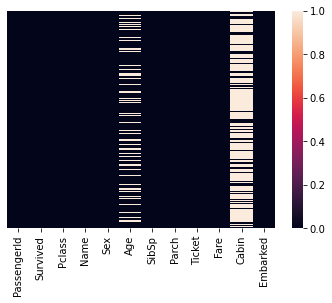

In [24]:
sns.heatmap(train.isnull(),yticklabels=False)

<AxesSubplot:>

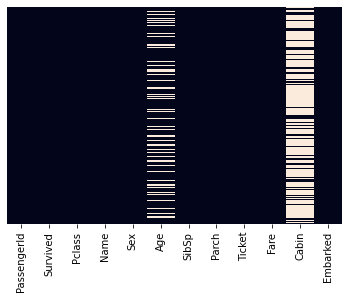

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

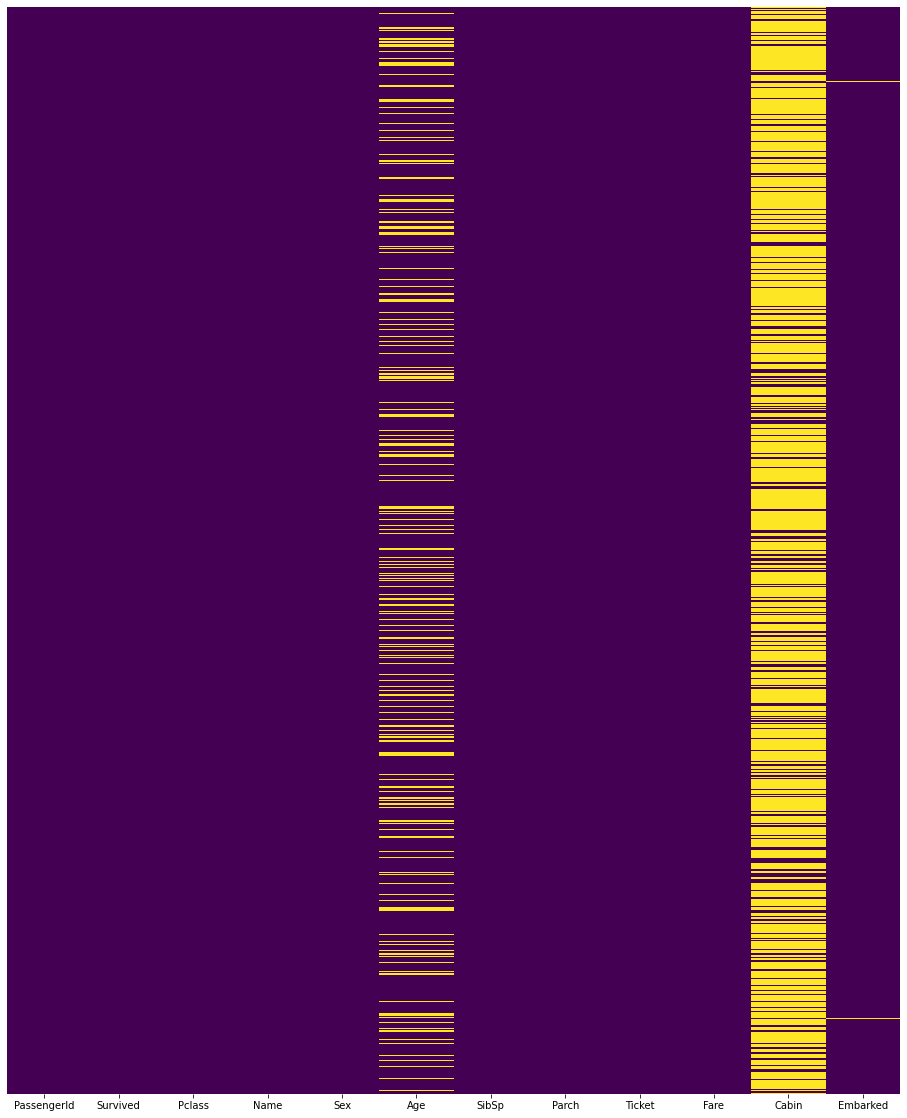

In [31]:
plt.figure(figsize = (16,20))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Now we can see the embarked has two null values in heatmap 

In [32]:
 train.isnull().sum()/( train.isnull().sum()+train.count())*100 # to see how many % of data are missing 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Roughly 20 Percent of the age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. we'll probably drop this later or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by viualizing some more of the data! check out the video for full explanation over these plos, this code is just to server as a reference

<AxesSubplot:xlabel='Survived', ylabel='count'>

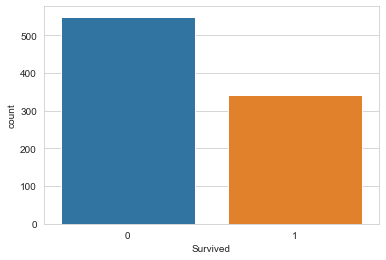

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

[Text(0, 0, '549 (61.6%)'), Text(0, 0, '342 (38.4%)')]

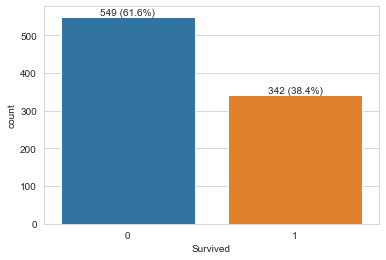

In [36]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',data=train)

abs_value = train['Survived'].value_counts(ascending=False).values #Numerical value
rel_value = train['Survived'].value_counts(ascending=False, normalize=True).values * 100  # Percentage value
lbls= [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_value,rel_value)]
ax.bar_label(container=ax.containers[0],labels=lbls)# Providing label

<AxesSubplot:xlabel='Survived', ylabel='count'>

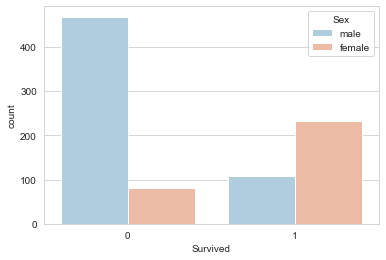

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

[Text(0, 0, '468 (81.1%)'), Text(0, 0, '109 (18.9%)')]

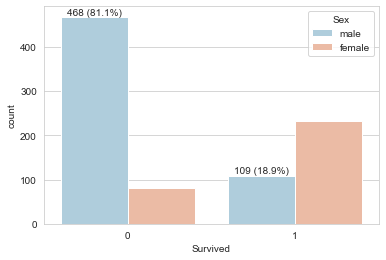

In [46]:
 #Dont't refer my kirukals
    sns.set_style('whitegrid')
ax = sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

m= train.query("Sex=='male'")
f = train.query("Sex=='female'")
                
abs_value_m = m['Survived'].value_counts(ascending=False).values #Numerical value
abs_value_f = f['Survived'].value_counts(ascending=False).values #Numerical value                
                
rel_value_m = m['Survived'].value_counts(ascending=False, normalize=True).values * 100  # Percentage value
rel_value_f = f['Survived'].value_counts(ascending=False, normalize=True).values * 100  # Percentage value
                
lbls= [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_value_m,rel_value_m)]
ax.bar_label(container=ax.containers[0],labels=lbls)# Providing label

In [42]:
m= train.query("Sex=='male'")

In [43]:
m

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [44]:
m['Sex'].unique()

array(['male'], dtype=object)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

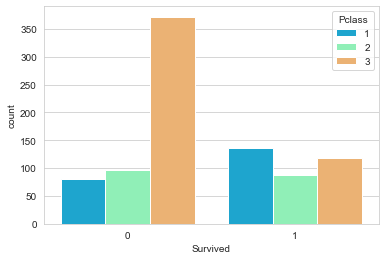

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

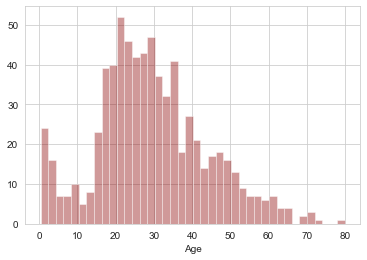

In [52]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

In [53]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age'>

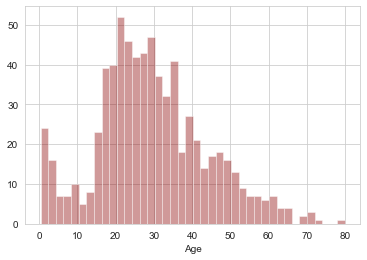

In [54]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

In [55]:
train['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age'>

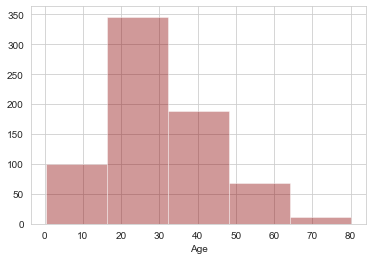

In [56]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=5)

<AxesSubplot:>

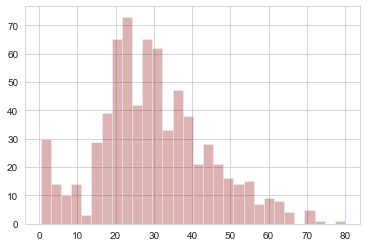

In [57]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

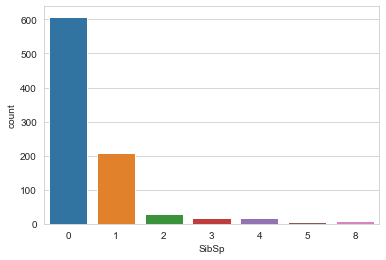

In [58]:
sns.countplot(x='SibSp',data=train)

[Text(0, 0, '608 (68.2%)'),
 Text(0, 0, '209 (23.5%)'),
 Text(0, 0, '28 (3.1%)'),
 Text(0, 0, '18 (2.0%)'),
 Text(0, 0, '16 (1.8%)'),
 Text(0, 0, '7 (0.8%)'),
 Text(0, 0, '5 (0.6%)')]

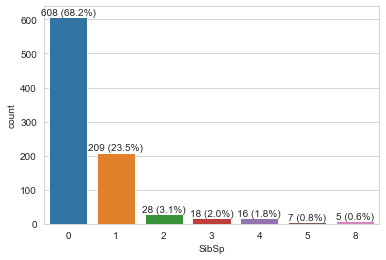

In [59]:
sns.set_style('whitegrid')
ax = sns.countplot(x='SibSp',data=train)

abs_value = train['SibSp'].value_counts(ascending=False).values #Numerical value
rel_value = train['SibSp'].value_counts(ascending=False, normalize=True).values * 100  # Percentage value
lbls= [f'{p[0]} ({p[1]:.1f}%)' for p in zip(abs_value,rel_value)]
ax.bar_label(container=ax.containers[0],labels=lbls)# Providing label

<AxesSubplot:>

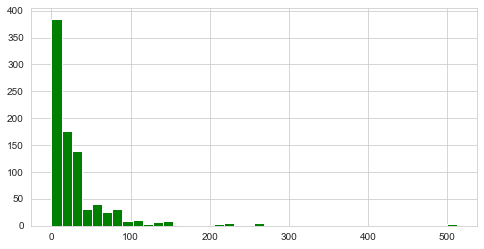

In [60]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Cufflinks for plots

Let's take a quick moment to shwo an example of cufflinks!

In [61]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [62]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=14ae1a3946dbc8a02d2b7cc46285acbf82bd9b8b9192d4732671046275b39068
  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks
Note: you may need to restart the kernel to use updated packages.


In [63]:
import cufflinks as cf
cf.go_offline()

In [64]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

#  Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class (based on the analysis). For example:


In [76]:
train[['Age','Pclass']]

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


<AxesSubplot:>

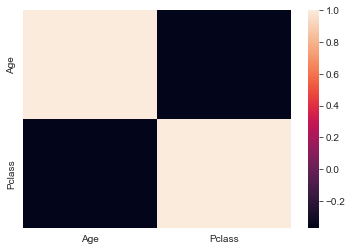

In [79]:
sns.heatmap( train[['Age','Pclass']].corr())

In [72]:
train.corr() # not sure how he found out

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

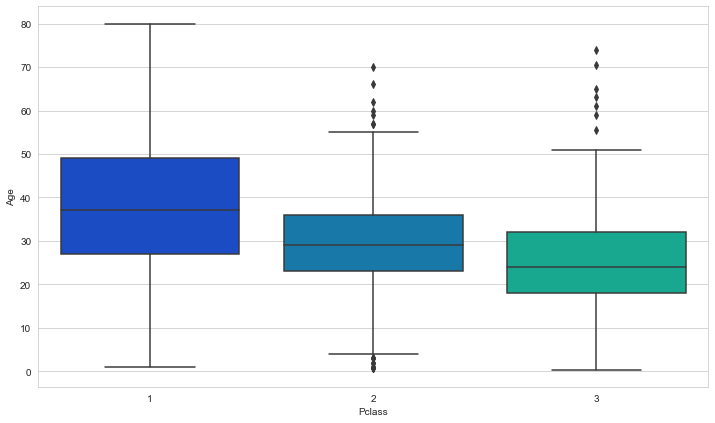

In [65]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

KeyError: 0

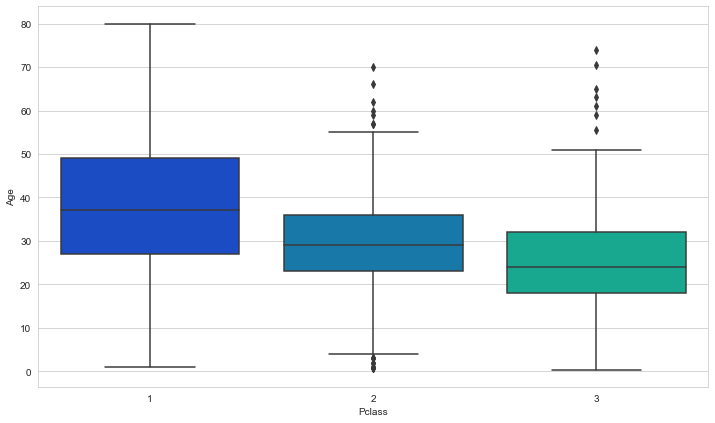

In [69]:
plt.figure(figsize=(12,7))
box_plot = sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

#sns.set_style("whitegrid")
#tips = sns.load_dataset("tips")
#box_plot = sns.boxplot(x="day",y="total_bill",data=tips)

medians = train.groupby(['Pclass'])['Age'].median()
vertical_offset = train['Age'].median() * 0.05 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

In [73]:
#One correction Sir-- In the boxplot, them middle line is the median(50% percentile). Thank you

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on pclass for Age

In [75]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        
        elif Pclass==2:
            return 29
        
        else:
            return 24
    else:
        return Age

Now Apply the function !

In [80]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
#the DataFrame's index (``axis=0``) or the DataFrame's columns(``axis=1``).

Now let's check that heat map again!

<AxesSubplot:>

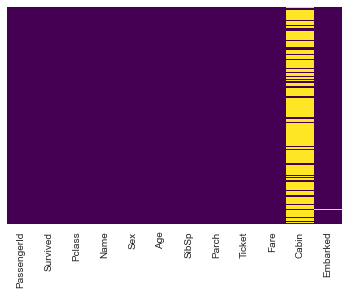

In [81]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#Now there is no null values for Age, lets check it numerically

In [82]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Great! Let's go ahead and drop the cabin column and the row in Embarked that is NaN.

In [83]:
train.drop('Cabin',axis=1,inplace=True)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

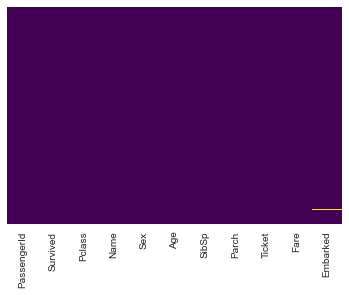

In [85]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [86]:
#Drop the row in Embarked that is NaN.
train.dropna(inplace=True)

<AxesSubplot:>

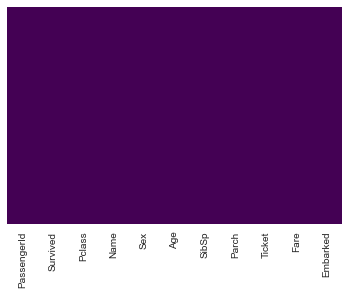

In [87]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [88]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [95]:
embark =pd.get_dummies(train['Embarked'],drop_first=True).head() 
# Whether to get k-1 dummies out of k categorical levels by removing the first level

In [96]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [94]:
sex = pd.get_dummies(train['Sex'],drop_first=True).head()
# The reason why we are dropping the first column is , we can still identify the other using male if it is 0 then it is female

In [93]:
sex

,male
0,1
1,0
2,0
3,0
4,1


In [98]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId' ],axis=1,inplace=True)

In [99]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [100]:
 train = pd.concat([train,sex,embark],axis=1)

In [110]:
train.head()
#Survived is Dependent feature and all the others are independent features

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


 Great! our data is ready for our model!

# Building a Logistic Regression model

Let's Start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training)

## Train Test Split

In [102]:
train.drop('Survived',axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [103]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'],test_size=0.30,
                                                   random_state=101)
#random_state : int, RandomState instance or None, default=None
    #Controls the shuffling applied to the data before applying the split

# Training and Predicting

In [106]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [116]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,NaN,NaN,NaN
651,2,18.0,0,1,23.0000,NaN,NaN,NaN
2,3,26.0,0,0,7.9250,0.0,0.0,1.0
690,1,31.0,1,0,57.0000,NaN,NaN,NaN
196,3,24.0,0,0,7.7500,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,NaN,NaN,NaN
840,3,20.0,0,0,7.9250,NaN,NaN,NaN
338,3,45.0,0,0,8.0500,NaN,NaN,NaN
524,3,24.0,0,0,7.2292,NaN,NaN,NaN


In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      5 non-null      float64
 7   Q         5 non-null      float64
 8   S         5 non-null      float64
dtypes: float64(5), int64(4)
memory usage: 69.5 KB


In [113]:
train.drop('Survived',axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Age     889 non-null    float64
 2   SibSp   889 non-null    int64  
 3   Parch   889 non-null    int64  
 4   Fare    889 non-null    float64
 5   male    5 non-null      float64
 6   Q       5 non-null      float64
 7   S       5 non-null      float64
dtypes: float64(5), int64(3)
memory usage: 62.5 KB


In [114]:
train['Survived'].info()

<class 'pandas.core.series.Series'>
Int64Index: 889 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
889 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


In [126]:
train = train.reset_index()

In [127]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'],test_size=0.30,
                                                   random_state=101)
#random_state : int, RandomState instance or None, default=None
    #Controls the shuffling applied to the data before applying the split

In [128]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [129]:
X_train.fillna(0).info()

,index,Pclass,Age,SibSp,Parch,Fare,male,Q,S
806,807,3,18.0,0,0,7.7750,0.0,0.0,0.0
650,651,2,18.0,0,1,23.0000,0.0,0.0,0.0
2,2,3,26.0,0,0,7.9250,0.0,0.0,1.0
689,690,1,31.0,1,0,57.0000,0.0,0.0,0.0
195,196,3,24.0,0,0,7.7500,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
575,576,2,34.0,0,0,13.0000,0.0,0.0,0.0
838,840,3,20.0,0,0,7.9250,0.0,0.0,0.0
337,338,3,45.0,0,0,8.0500,0.0,0.0,0.0
523,524,3,24.0,0,0,7.2292,0.0,0.0,0.0


In [130]:
X_train.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 806 to 863
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   622 non-null    int64  
 1   Pclass  622 non-null    int64  
 2   Age     622 non-null    float64
 3   SibSp   622 non-null    int64  
 4   Parch   622 non-null    int64  
 5   Fare    622 non-null    float64
 6   male    622 non-null    float64
 7   Q       622 non-null    float64
 8   S       622 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 48.6 KB


In [131]:
logmodel = LogisticRegression()
logmodel.fit(X_train.fillna(0),y_train.fillna(0))

LogisticRegression()

In [133]:
predictions = logmodel.predict(X_test.fillna(0))

In [134]:
from sklearn.metrics import confusion_matrix

In [135]:
accuracy= confusion_matrix(y_test,predictions)

In [136]:
accuracy

array([[142,  21],
       [ 53,  51]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7228464419475655

In [141]:
accuracy= confusion_matrix(y_test.fillna(0),predictions)

In [142]:
accuracy

array([[142,  21],
       [ 53,  51]], dtype=int64)

In [143]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7228464419475655